# Performance Analyser for AudExp

In [1]:
import wave
import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import wavfile

In [2]:
original = wave.open('./Test/Test.wav', 'rb')

In [3]:
harmonic_enhanced = wave.open('./Test/enhanced_vocals_harmonic.wav', 'rb')

In [4]:
percussive_enhanced = wave.open('./Test/enhanced_vocals_percussive.wav', 'rb')

## Getting Audio Parameters

In [5]:
print('Parameters of harmonic_enhanced:', original.getparams())
print('Parameters of harmonic:', harmonic_enhanced.getparams())
print('Parameters of percussive:', percussive_enhanced.getparams())

Parameters of harmonic_enhanced: _wave_params(nchannels=2, sampwidth=2, framerate=48000, nframes=9089220, comptype='NONE', compname='not compressed')
Parameters of harmonic: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=4175360, comptype='NONE', compname='not compressed')
Parameters of percussive: _wave_params(nchannels=1, sampwidth=2, framerate=22050, nframes=4175360, comptype='NONE', compname='not compressed')


In [6]:
harmonic_enhanced_sample_freq = harmonic_enhanced.getframerate()
percussive_enhanced_sample_freq = percussive_enhanced.getframerate()


In [7]:
harmonic_enhanced_n_samples = harmonic_enhanced.getnframes()
percussive_enhanced_n_samples = percussive_enhanced.getnframes()

In [8]:
harmonic_enhanced_signal_wave = harmonic_enhanced.readframes(-1)
percussive_enhanced_signal_wave = percussive_enhanced.readframes(-1)

In [9]:
harmonic_enhanced_duration = harmonic_enhanced_n_samples/harmonic_enhanced_sample_freq
percussive_enhanced_duration = percussive_enhanced_n_samples/percussive_enhanced_sample_freq

## Creating Numpy Objects

In [10]:
# numpy object from the signal_wave. This will be plotted on the y-axis.

harmonic_enhanced_signal_array = np.frombuffer(harmonic_enhanced_signal_wave, dtype=np.int16)
percussive_enhanced_signal_array = np.frombuffer(percussive_enhanced_signal_wave, dtype=np.int16)

In [11]:
# numpy object from duration. This will be plotted on the x-axis

harmonic_enhanced_time = np.linspace(0, harmonic_enhanced_duration, num=harmonic_enhanced_n_samples)
percussive_enhanced_time = np.linspace(0, harmonic_enhanced_duration, num=percussive_enhanced_n_samples)

## Creating the plot

NameError: name 'time' is not defined

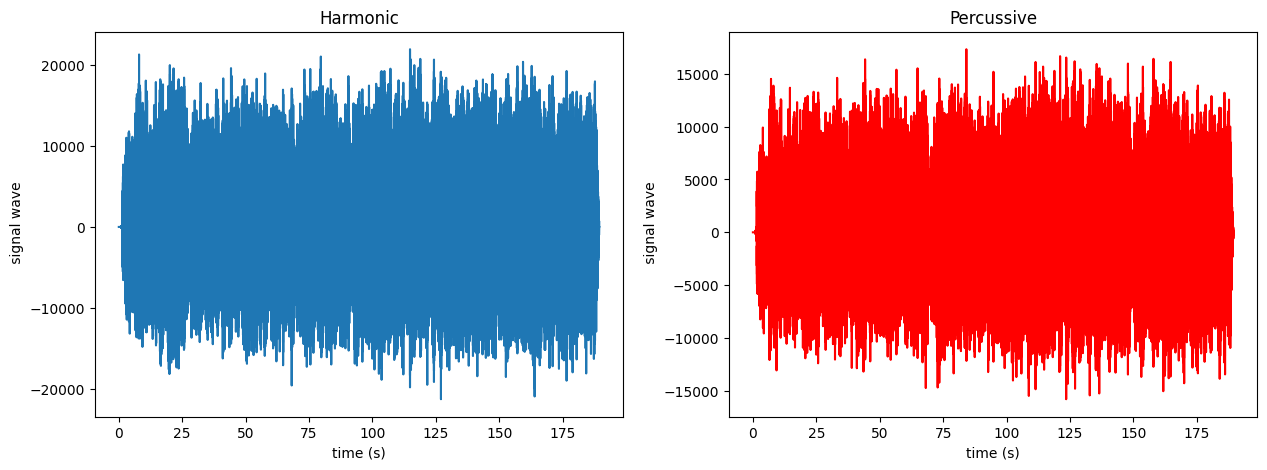

In [12]:
plt.figure(figsize=(15, 5))


# Plot 1
plt.subplot(1, 2, 1)
plt.plot(harmonic_enhanced_time, harmonic_enhanced_signal_array)
plt.title('Harmonic')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')


# Plot 2 
plt.subplot(1, 2, 2)
plt.plot(percussive_enhanced_time, percussive_enhanced_signal_array, color='red')
plt.title('Percussive')
plt.ylabel(' signal wave')
plt.xlabel('time (s)')

plt.xlim(0, time) #limiting the x axis to the audio time
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_16916\652726984.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


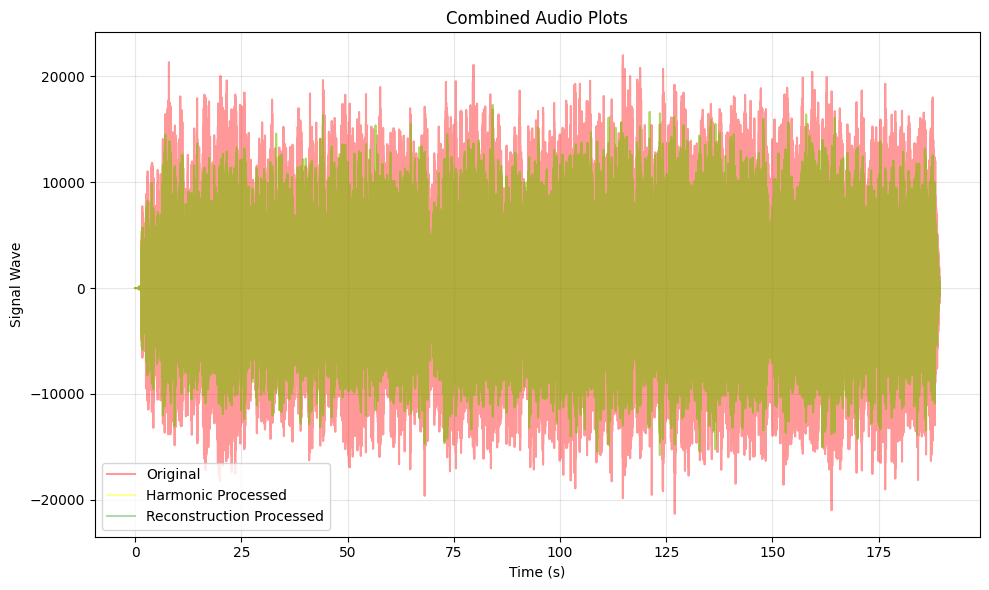

In [13]:
# Assuming you have already defined harmonic_enhanced_time, harmonic_enhanced_signal_array, percussive_enhanced_time, and percussive_enhanced_signal_array

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot 1
plt.plot(harmonic_enhanced_time, harmonic_enhanced_signal_array, label='Original', alpha=0.4, color='red')

# Plot 2
plt.plot(percussive_enhanced_time, percussive_enhanced_signal_array, color='yellow', label='Harmonic Processed', alpha=0.4)

# Plot 3 (same as Plot 2 in your original code)
plt.plot(percussive_enhanced_time, percussive_enhanced_signal_array, color='green', label='Reconstruction Processed', alpha=0.3)

plt.title('Combined Audio Plots')
plt.ylabel('Signal Wave')
plt.xlabel('Time (s)')
plt.legend()
plt.grid(True, alpha=0.3)  # Also added transparency to the grid

plt.tight_layout()
plt.show()

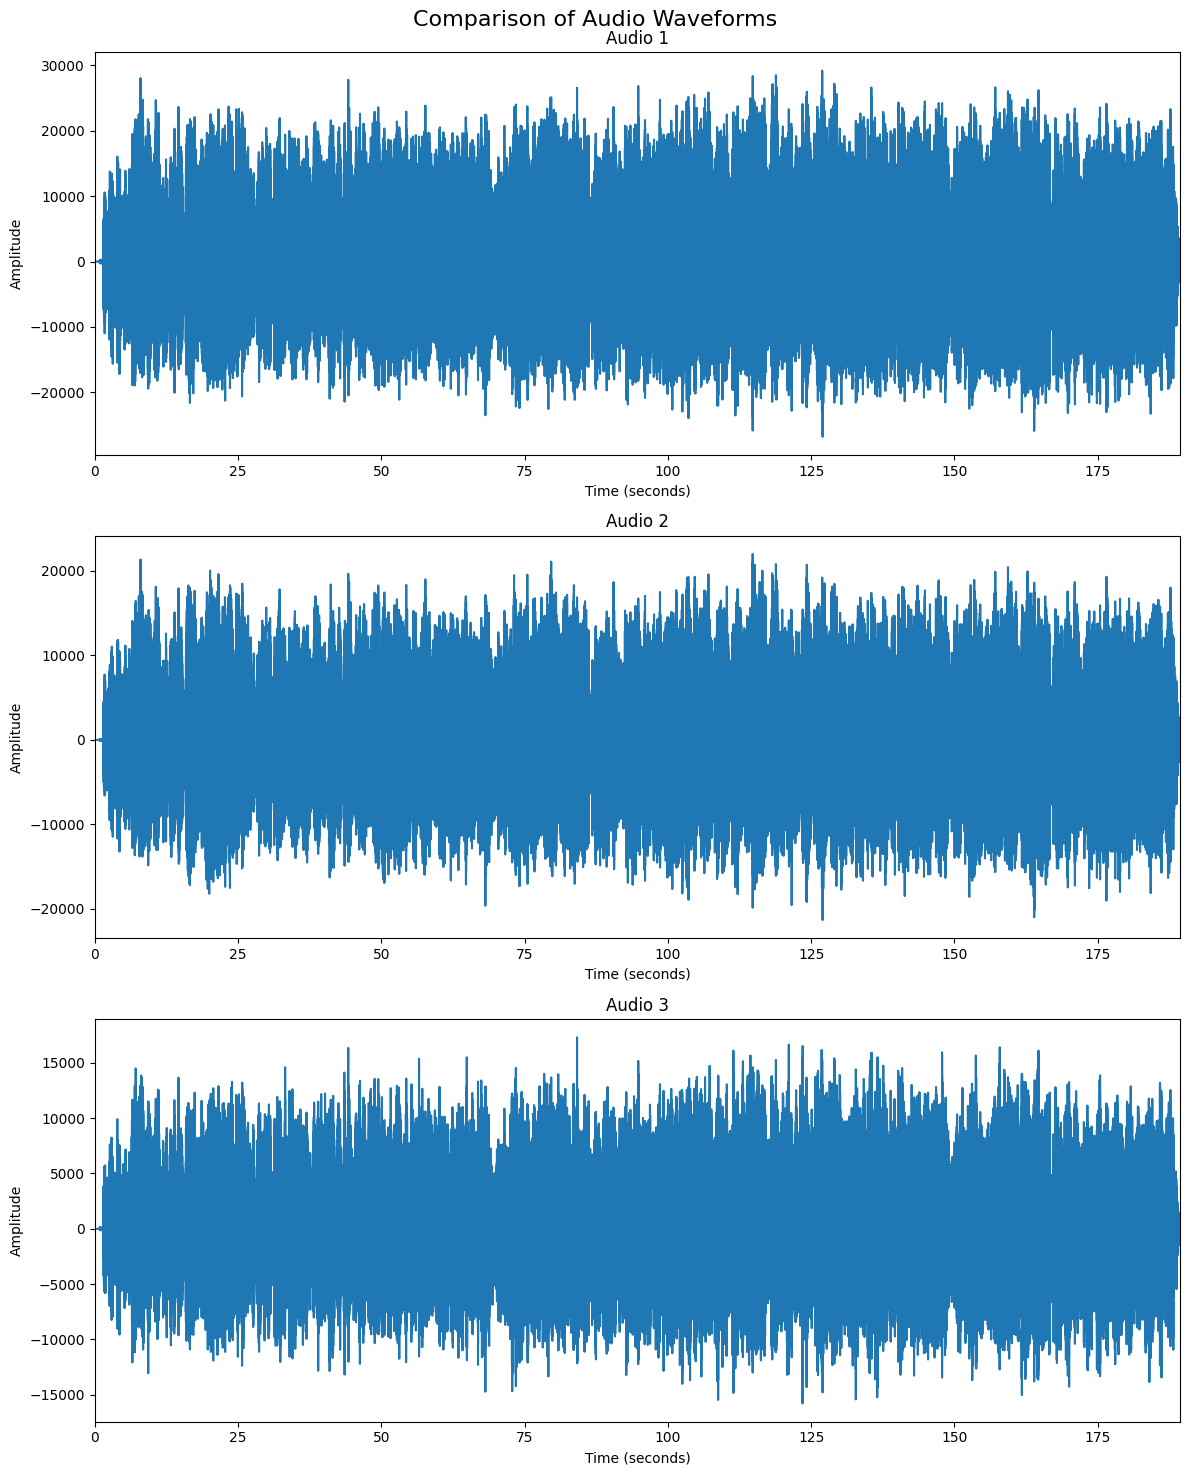

In [16]:
def read_wav(filename):
    sample_rate, data = wavfile.read(filename)
    return sample_rate, data

def plot_waveform(ax, sample_rate, data, title):
    time = np.arange(0, len(data)) / sample_rate
    ax.plot(time, data)
    ax.set_xlabel('Time (seconds)')
    ax.set_ylabel('Amplitude')
    ax.set_title(title)
    ax.set_xlim(0, len(data) / sample_rate)

# List of .wav files to compare
wav_files = ['./Test/Test.wav', './Test/enhanced_vocals_harmonic.wav', './Test/enhanced_vocals_percussive.wav']

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 15))
fig.suptitle('Comparison of Audio Waveforms', fontsize=16)

# Plot each audio file
for i, wav_file in enumerate(wav_files):
    sample_rate, data = read_wav(wav_file)
    
    # If stereo, use only one channel
    if len(data.shape) > 1:
        data = data[:, 0]
    
    plot_waveform(axs[i], sample_rate, data, f'Audio {i+1}')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()